In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt


In [2]:
# Load data prepared in Module 3
df = pd.read_csv(
    "final_feature_engineered_data.csv",
    index_col=0,
    parse_dates=True
)

df.head()


,hour,day,month,day_of_week,lag_1,lag_2,lag_3,rolling_mean_3,rolling_mean_6,Energy_Scaled
Timestamp,,,,,,,,,,
2023-01-01 05:00:00,5,1,1,6,0.411342,0.315906,0.706224,0.331581,0.412218,0.267497
2023-01-01 06:00:00,6,1,1,6,0.267497,0.411342,0.315906,0.265929,0.382527,0.118949
2023-01-01 07:00:00,7,1,1,6,0.118949,0.267497,0.411342,0.339327,0.408575,0.631535
2023-01-01 08:00:00,8,1,1,6,0.631535,0.118949,0.267497,0.415952,0.373767,0.497372
2023-01-01 09:00:00,9,1,1,6,0.497372,0.631535,0.118949,0.551959,0.408944,0.526971


In [3]:
# Separate features and target
X = df.drop(columns=['Energy_Scaled'])
y = df['Energy_Scaled']

X.head(), y.head()


(                     hour  day  month  day_of_week     lag_1     lag_2  \
 Timestamp                                                                
 2023-01-01 05:00:00     5    1      1            6  0.411342  0.315906   
 2023-01-01 06:00:00     6    1      1            6  0.267497  0.411342   
 2023-01-01 07:00:00     7    1      1            6  0.118949  0.267497   
 2023-01-01 08:00:00     8    1      1            6  0.631535  0.118949   
 2023-01-01 09:00:00     9    1      1            6  0.497372  0.631535   
 
                         lag_3  rolling_mean_3  rolling_mean_6  
 Timestamp                                                      
 2023-01-01 05:00:00  0.706224        0.331581        0.412218  
 2023-01-01 06:00:00  0.315906        0.265929        0.382527  
 2023-01-01 07:00:00  0.411342        0.339327        0.408575  
 2023-01-01 08:00:00  0.267497        0.415952        0.373767  
 2023-01-01 09:00:00  0.118949        0.551959        0.408944  ,
 Timestamp
 2023-

In [4]:
# Train-Test split (NO shuffling because this is time-series data)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (7023, 9)
Test size: (1756, 9)


In [5]:
# Create and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")


Linear Regression model trained successfully!


In [6]:
# Predict energy consumption on test data
y_pred = lr_model.predict(X_test)

y_pred[:5]


array([0.29294606, 0.35988935, 0.35850622, 0.37067773, 0.58865837])

In [7]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1.5525340441239901e-15
Root Mean Squared Error (RMSE): 1.6324058632622852e-15


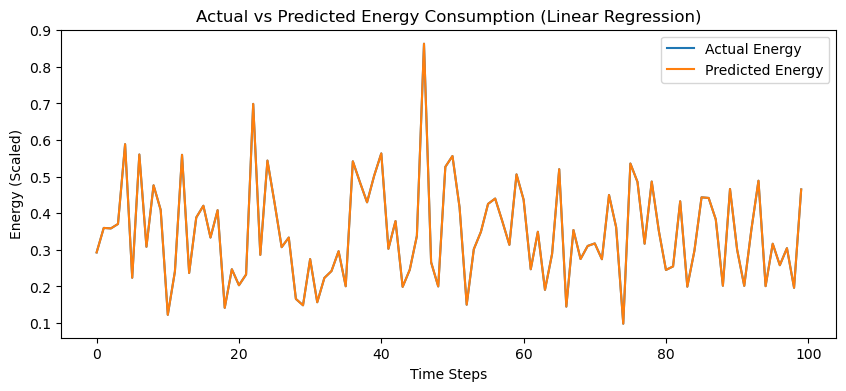

In [8]:
plt.figure(figsize=(10, 4))

plt.plot(y_test.values[:100], label='Actual Energy')
plt.plot(y_pred[:100], label='Predicted Energy')

plt.title("Actual vs Predicted Energy Consumption (Linear Regression)")
plt.xlabel("Time Steps")
plt.ylabel("Energy (Scaled)")
plt.legend()
plt.show()


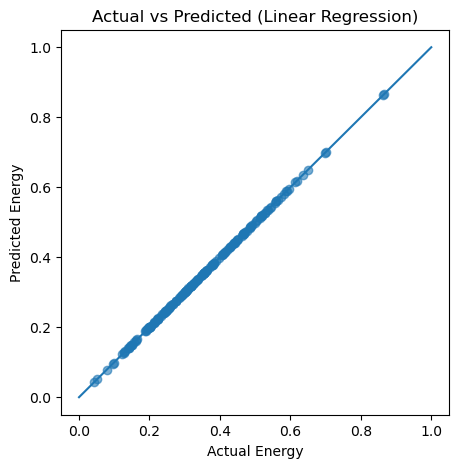

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(y_test.values[:200], y_pred[:200], alpha=0.6)
plt.plot([0,1],[0,1])  # perfect prediction line
plt.xlabel("Actual Energy")
plt.ylabel("Predicted Energy")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()  # for a clear difference


In [10]:
results = pd.DataFrame({
    'Actual': y_test.values,
    'LR_Predicted': y_pred
})
results.to_csv("linear_regression_results.csv", index=False)
